# Pandas I: Pandas Objects

*Disclaimer: The contents of this notebook are developped according to Python Data Science Handbook, by Jake VanderPlas and Python for Data Analysis, by Wes McKinney*

Just as we generally import NumPy under the alias np, we will import Pandas under the alias pd

In [1]:
import numpy as np
import pandas as pd
pd.__version__

'1.3.4'

At the very basic level, Pandas objects can be thought of as enhanced versions of NumPy structured arrays in which the rows and columns are identified with labels rather than simple integer indices. The biggest difference is that Pandas is designed for working with tabular or heterogeneous data. Numpy, by contrast, is best suited for working with homogeneous nemerical data. We will introduce following fundamental Pandas data structures: 
    
- `Series`
- `DataFrame`
- `Index` 
- `MultiIndex`

**Keep in mind that in Pandas, string data is always stored with an `object` dtype**

### The Pandas Series Object
A Pandas `Series` is a one-dimensional array of indexed data. It can be created from a list or array as follows

In [2]:
ser = pd.Series([0.25, 0.5, 0.75, 1.0], name = 'test')
ser

0    0.25
1    0.50
2    0.75
3    1.00
Name: test, dtype: float64

In [3]:
# Series can contain data with different types
ser1 = pd.Series([1, 'a', 3.6, 6])
ser1

0      1
1      a
2    3.6
3      6
dtype: object

In [4]:
ser1[2]

3.6

In [5]:
type(ser1[2])

float

In [6]:
ser.index

RangeIndex(start=0, stop=4, step=1)

In [7]:
ser.values

array([0.25, 0.5 , 0.75, 1.  ])

In [8]:
ser.name

'test'

In [9]:
ser.shape

(4,)

In [10]:
ser.size

4

### Series Attributes

<div>
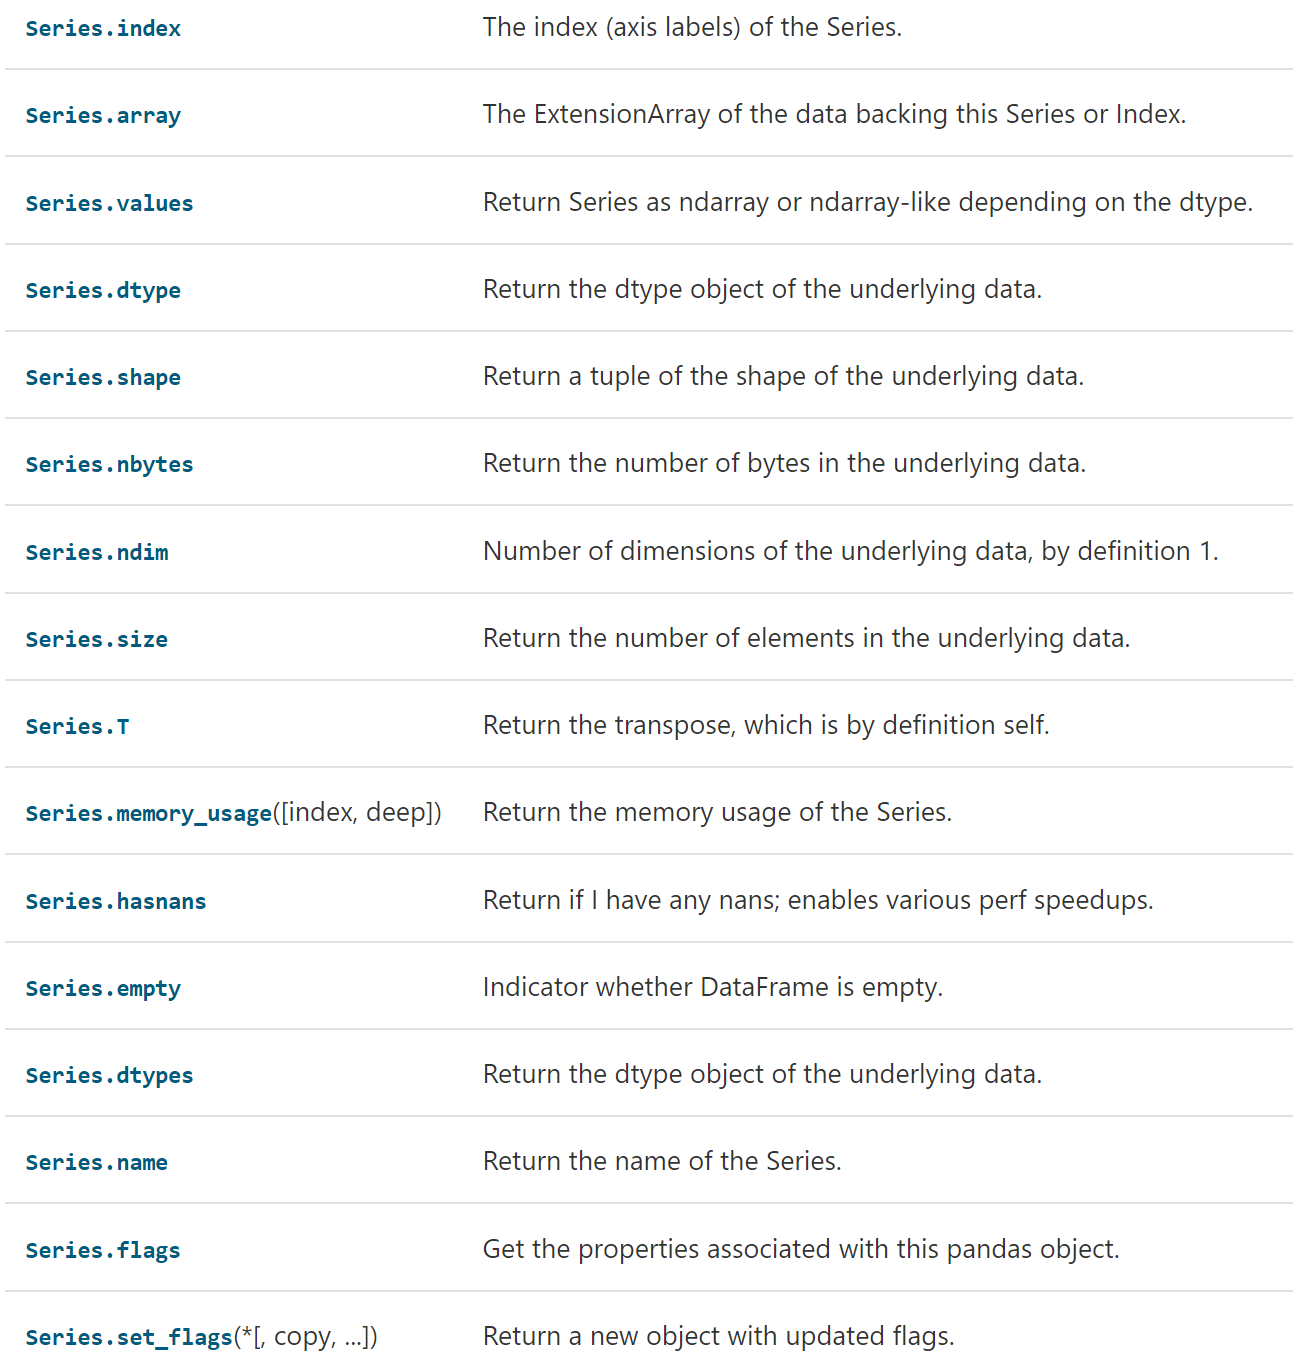
</div>

The `Series` wraps both a sequence of values and a sequence of indices, which we can access with the `values` and `index` attributes. The `values` are simply a familiar NumPy array. The `index` is an array-like object of type `pd.Index`

In [11]:
ser.values

array([0.25, 0.5 , 0.75, 1.  ])

In [12]:
ser.index

RangeIndex(start=0, stop=4, step=1)

Like with a NumPy array, data can be accessed by the associated index via the familiar Python square-bracket notation. The Pandas `Series` is much more general and flexible than the one-dimensional NumPy array that it emulates

In [13]:
ser[1]

0.5

In [14]:
ser[1:3]

1    0.50
2    0.75
Name: test, dtype: float64

### `Series` as Generalized NumPy Array
From what we've seen so far, it may look like the Series object is basically interchangeable with a one-dimensional NumPy array. The essential difference is the presence of the index: while the Numpy Array has an **implicitly defined** integer index used to access the values, the Pandas `Series` has an **explicitly defined** index associated with the values.

This explicit index definition gives the `Series` object additional capabilities. For example, the index need not be an integer, but can consist of values of any desired type. For example, if we wish, we can use strings as an index

In [15]:
ser = pd.Series([0.25, 0.5, 0.75, 1.0], index = ['a', 'b', 'c', 'd'])
ser

a    0.25
b    0.50
c    0.75
d    1.00
dtype: float64

We can even use non-contiguous or non-sequential indices

In [16]:
ser = pd.Series([0.25, 0.5, 0.75, 1.0], index = [2, 5, 3, 7])
ser

2    0.25
5    0.50
3    0.75
7    1.00
dtype: float64

In [17]:
ser[5]

0.5

### `Series` as specialized dictionary
From the above example, you can think of a Pandas `Series` a bit like a specialization of a Python `dictionary`. A `dictionary` is a structure that maps arbitrary keys to a set of arbitrary values, and a Series is a structure which maps typed keys to a set of typed values. This typing is important: just as the type-specific compiled code behind a NumPy array makes it more efficient than a Python list for certain operations, the type information of a Pandas `Series` makes it much more efficient than Python dictionaries for certain operations.
    
We can construct a `Series` object directly from a Python `dictionary`

In [18]:
population_dict = {'California': 38332521,
                   'Texas': 26448193,
                   'New York': 19651127,
                   'Florida': 19552860,
                   'Illinois': 12882135}
population = pd.Series(population_dict)
population

California    38332521
Texas         26448193
New York      19651127
Florida       19552860
Illinois      12882135
dtype: int64

By default, a `Series` will be created where the index is drawn from the **sorted keys**. From here, typical dictionary-style item access can be performed

In [19]:
population['California']

38332521

Unlike a `dictionary`, though, the `Series` also supports array-style operations such as slicing

In [20]:
# the value associated with the ending label is also included in the slice
population['California':'Illinois']

California    38332521
Texas         26448193
New York      19651127
Florida       19552860
Illinois      12882135
dtype: int64

### Constructing `Series` Objects

**Syntax**

`pd.Series(data, index = index)`

where `index` is an optional argument, and `data` can be one of many entities. For example, `data` can be a `list` or NumPy `array`, in which case `index` defaults to an integer sequence.

In [21]:
pd.Series([2, 4, 6])

0    2
1    4
2    6
dtype: int64

`data` can be a scalar, which is repeated to fill the specified `index`

In [22]:
pd.Series(5, index = [100, 200, 300])

100    5
200    5
300    5
dtype: int64

`data` can be a `dictionary`, in which `index` defaults to the **sorted** dictionary keys

In [23]:
ser = pd.Series({2:'a', 1:'b', 3:'c'})
ser

2    a
1    b
3    c
dtype: object

In [24]:
type(ser[2])

str

In [25]:
sdata = {'Ohio': 35000, 'Texas': 71000, 'Oregon': 16000, 'Utah': 5000}
obj1 = pd.Series(sdata)
obj1

Ohio      35000
Texas     71000
Oregon    16000
Utah       5000
dtype: int64

In each case, the `index` can be explicitly set if a different result is preferred

In [26]:
pd.Series({2:'a', 1:'b', 3:'c'}, index = [3, 2])

3    c
2    a
dtype: object

In [27]:
sdata

{'Ohio': 35000, 'Texas': 71000, 'Oregon': 16000, 'Utah': 5000}

In [28]:
states = ['California', 'Ohio', 'Oregon', 'Texas']
obj2 = pd.Series(sdata, index = states)
obj2

California        NaN
Ohio          35000.0
Oregon        16000.0
Texas         71000.0
dtype: float64

Notice that in this case, the `Series` is populated only with the explicitly identified keys. Both the `Series` object itself and its `index` have a `name` attribute, which integrates with other key areas of Pandas functionality.

In [29]:
obj1.name = 'population'
obj1.index.name = 'state'
obj1

state
Ohio      35000
Texas     71000
Oregon    16000
Utah       5000
Name: population, dtype: int64

A Series' index can be altered in-place by assignment

In [30]:
obj1.index = ['A', 'B', 'C', 'D']
obj1

A    35000
B    71000
C    16000
D     5000
Name: population, dtype: int64

### The Pandas DataFrame Object
The next fundamental structure in Pandas is the `DataFrame`. Like the `Series` object discussed in the previous section, the `DataFrame` can be thought of either as a generalization of a NumPy `array`, or as a specialization of a Python `dictionary`

### `DataFrame` Atributes

<div>
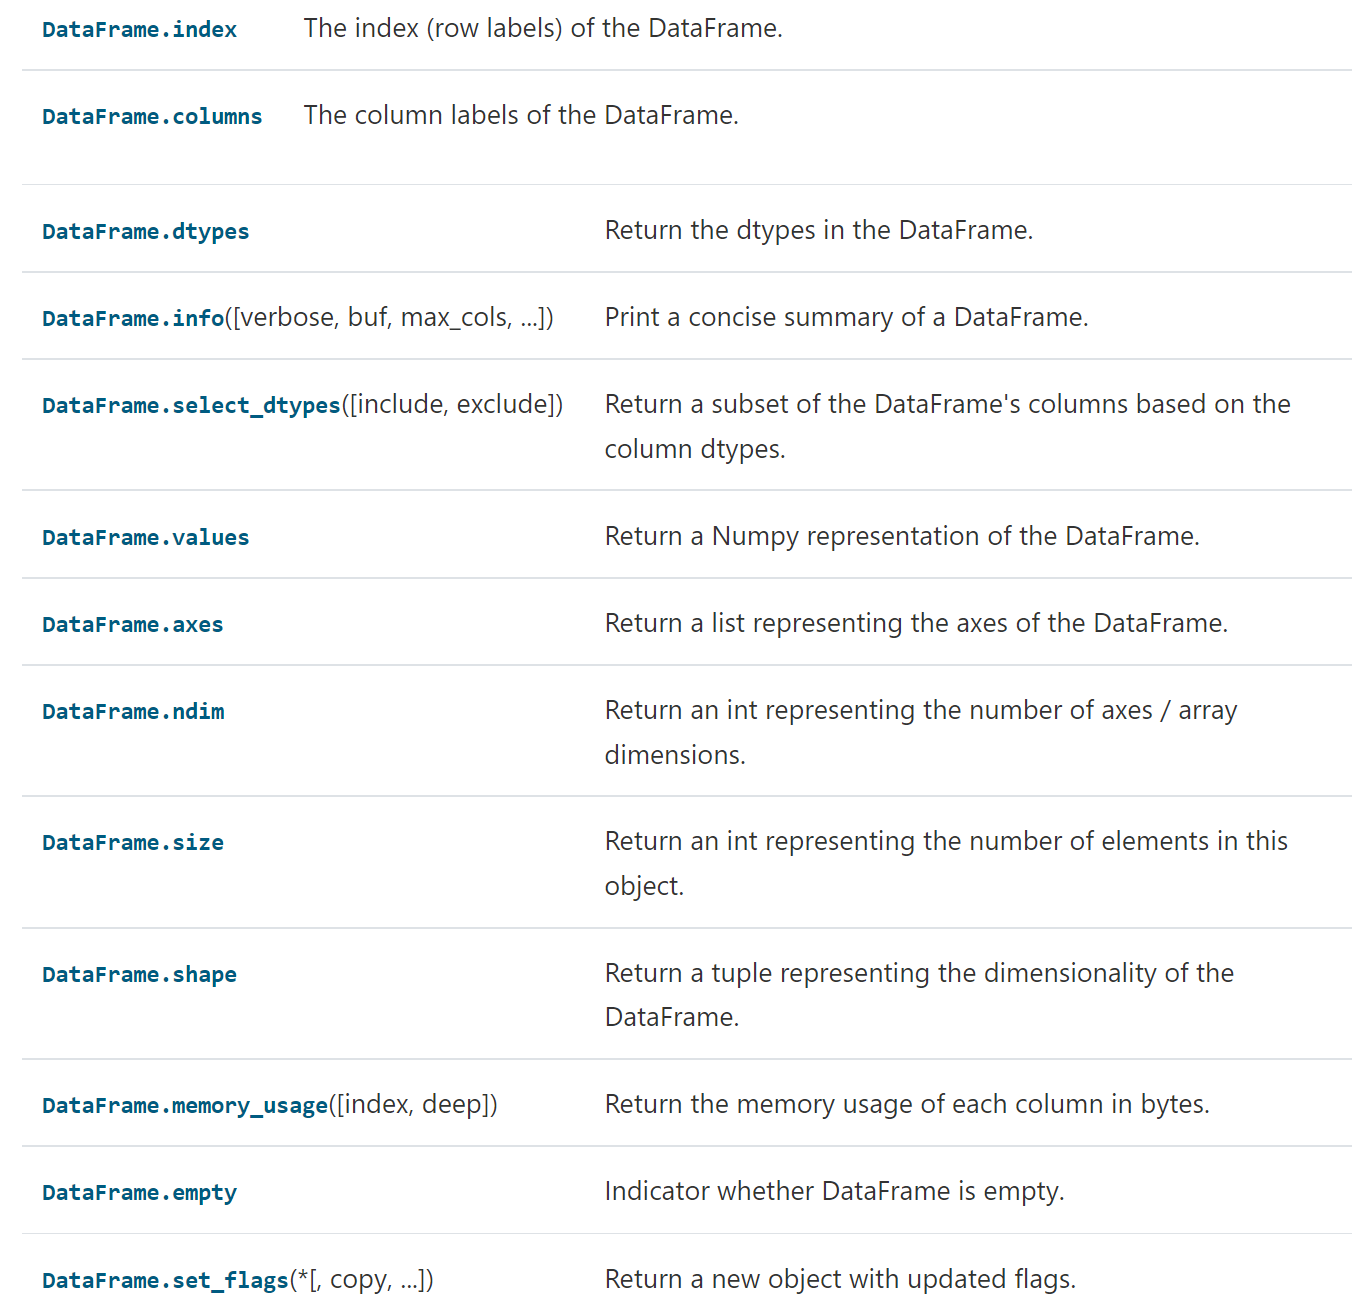
</div>

#### `DataFrame` as a Generalized NumPy Array
If a `Series` is an analog of a one-dimensional `array` with flexible indices, a `DataFrame` is an analog of a two-dimensional `array` with both flexible row indices and flexible column names. Just as you might think of a two-dimensional `array` as an ordered sequence of aligned one-dimensional columns, you can think of a `DataFrame` as a sequence of aligned `Series` objects. Here, by "aligned" we mean that they share the same `index`.

In [31]:
area_dict = {'California': 423967, 'Texas': 695662, 'New York': 141297,
             'Florida': 170312, 'Illinois': 149995}
area = pd.Series(area_dict)
area

California    423967
Texas         695662
New York      141297
Florida       170312
Illinois      149995
dtype: int64

In [32]:
population

California    38332521
Texas         26448193
New York      19651127
Florida       19552860
Illinois      12882135
dtype: int64

In [33]:
states = pd.DataFrame({'population': population,
                       'area': area})
states

,population,area
California,38332521,423967
Texas,26448193,695662
New York,19651127,141297
Florida,19552860,170312
Illinois,12882135,149995


Like the `Series` object, the `DataFrame` has an `index` attribute that gives access to the `index` labels. Additionally, the `DataFrame` has a `columns` attribute, which is an `Index` object holding the column labels. You can also use the `values` attribute to access the underlying data.

In [34]:
states.index

Index(['California', 'Texas', 'New York', 'Florida', 'Illinois'], dtype='object')

In [35]:
states.columns

Index(['population', 'area'], dtype='object')

In [36]:
states.values

array([[38332521,   423967],
       [26448193,   695662],
       [19651127,   141297],
       [19552860,   170312],
       [12882135,   149995]])

In [37]:
# preferred way to get underlying data
states.to_numpy()

array([[38332521,   423967],
       [26448193,   695662],
       [19651127,   141297],
       [19552860,   170312],
       [12882135,   149995]])

In [38]:
states.T
states.transpose()

,California,Texas,New York,Florida,Illinois
population,38332521,26448193,19651127,19552860,12882135
area,423967,695662,141297,170312,149995


If a DataFrame's `index` and `columns` have theri `name` attributes set, these will also be displayed

In [39]:
states.index.name = 'state'
states.columns.name = 'info'
states

info,population,area
state,,
California,38332521,423967
Texas,26448193,695662
New York,19651127,141297
Florida,19552860,170312
Illinois,12882135,149995


### `DataFrame` as Specialized Dictionary
Similarly, we can also think of a `DataFrame` as a specialization of a `dictionary`. Where a `dictionary` maps a key to a value, a `DataFrame` maps a column name to a `Series` of column data. For example, asking for the `area` attribute returns the `Series` object containing the areas we saw earlier

In [40]:
states['area']

state
California    423967
Texas         695662
New York      141297
Florida       170312
Illinois      149995
Name: area, dtype: int64

A column in a `DataFrame` can also be retrieved as a `Series` by attribute

In [41]:
# access the column using the attribute
states.area

state
California    423967
Texas         695662
New York      141297
Florida       170312
Illinois      149995
Name: area, dtype: int64

In a two-dimesnional NumPy `array`, `data[0]` will return the first row. For a `DataFrame`, `data['col0']` will return the first column. Because of this, it is probably better to think about DataFrames as generalized dictionaries rather than generalized arrays. The column returned from indexing a `DataFrame` is a view on the underlying data, not a copy. Thus, any in-place modifications to the `series` will be reflected in the `DataFrame`. The column can be explicitly copied with the `Series` `copy` method.

### Modify Exising Columns and Add New Columns
Columns can be modified by assignment. When you are assigning lists or arrays to a column, the value's length must match the length of the `DataFrame`. If you assign a `Series`, its labels will be realigned eactly to the `DataFrame` index, inserting missing values in any holes.

In [42]:
df = pd.read_csv('temperature.csv')
df

FileNotFoundError: [Errno 2] No such file or directory: 'temperature.csv'

In [43]:
df.info()

NameError: name 'df' is not defined

In [44]:
type(df['High Temperature'][0])

NameError: name 'df' is not defined

In [45]:
df['High Temperature'] = df['High Temperature'].str.replace('℃', '').astype('int32')
df['Low Temperature'] = df['Low Temperature'].str.replace('℃', '').astype('int32')
df

NameError: name 'df' is not defined

In [46]:
type(df['High Temperature'][0])

NameError: name 'df' is not defined

Assigning a coulumn that does not exist will create a new column. The `del` keyword will delete columns as with a `dict`

In [50]:
df['Temperature Diff'] = df['High Temperature'] - df['Low Temperature']
df

NameError: name 'df' is not defined

In [51]:
del df['Temperature Diff']
df

NameError: name 'df' is not defined

### Use `df.apply`
Create a new column `Temperature Type` and assign the values according to the following conditions
- if high temperature > 33, tmeperature type is hot
- if low temperature < -10, trmperature type is cold
- other case, temperature type is normal

DataFrame's `apply` method applies a function on one-dimensional array to each column or row. Objects passed to the function are **Series objects** whose index is either the DataFrame’s index (default `axis = 0`) or the DataFrame’s columns (`axis = 1`)

In [49]:
def temp_type(x):
    if x['High Temperature'] > 33:
        return 'Hot'
    if x['Low Temperature'] < -10:
        return 'Cold'
    return 'Normal'

df['Temperature Type'] = df.apply(temp_type, axis = 1) # the right side generate a Series with index matching df
df

NameError: name 'df' is not defined

In [ ]:
df['Temperature Type'].value_counts()

### Use `df.assign`
`assign` function can be used to assign new columns to a `DataFrame`. Returns a new object with all original columns in addition to new ones. Existing columns that are re-assigned will be overwritten.

In [47]:
# add multiple columns at the same time
# Celsius to Fahrenheit
# x represents the df
df.assign(
    High_Temp_F = lambda x : x['High Temperature'] * 9 / 5 + 32,
    Low_Temp_F = lambda x : x['Low Temperature'] * 9 / 5 + 32
)

NameError: name 'df' is not defined

### Assign Column Values According to Conditions
Create a new column `Temp Diff Type` and assign the values according to the following conditions
- if high temperature - low temperature > 10, big temperature difference
- otherwise normal temperature difference

In [ ]:
# create an empty column
df['Temp Diff Type'] = ''
df.loc[df['High Temperature'] - df['Low Temperature'] > 10, 'Temp Diff Type'] = 'Big Difference'
df.loc[df['High Temperature'] - df['Low Temperature'] <= 10, 'Temp Diff Type'] = 'Normal'
df

In [ ]:
df['Temp Diff Type'].value_counts()

### Constructing DataFrame Objects

**Syntax**

`pd.DataFrame(data, index = index, columns = columns)`

`index` and `columns` are optional

#### From a Single `Series` Object
A `DataFrame` is a collection of `Series` objects, and a single-column `DataFrame` can be constructed from a single `Series`

In [ ]:
pd.DataFrame(population, columns = ['population'])

#### From a List of Dicts
Any list of dictionaries can be made into a `DataFrame`

In [2]:
import pandas as pd
data = [{'a': i, 'b': 2 * i} for i in range(3)]
pd.DataFrame(data)

,a,b
0,0,0
1,1,2
2,2,4


Even if some keys in the dictionary are missing, Pandas will fill them in with `NaN` (i.e., "not a number") values

In [3]:
pd.DataFrame([{'a': 1, 'b': 2}, {'b': 3, 'c': 4}])

,a,b,c
0,1.0,2,NaN
1,NaN,3,4.0


#### From a Dictionary of `Series` Objects

In [ ]:
pd.DataFrame({'population': population,
              'area': area})

#### From a two-dimensional NumPy `array`
Given a two-dimensional array of data, we can create a `DataFrame` with any specified column and index names. If omitted, an integer index will be used for each

In [5]:
import numpy as np
pd.DataFrame(np.random.rand(3, 2),
             columns = ['foo', 'bar'],
             index = ['a', 'b', 'c'])

,foo,bar
a,0.476625,0.397205
b,0.425964,0.747467
c,0.200592,0.011315


### Dropping Entries From An Axis
`drop` method will return a new object with the indicated value or values deleted from an axis

In [ ]:
obj = pd.Series(np.arange(5.), index=['a', 'b', 'c', 'd', 'e'])
obj

In [ ]:
new_obj = obj.drop('c')
new_obj

In [ ]:
obj.drop(['d', 'c'])

With `DataFrame`, index values cab be deleted from either axis

In [ ]:
data = pd.DataFrame(np.arange(16).reshape((4, 4)),
                    index = ['Ohio', 'Colorado', 'Utah', 'New York'],
                    columns = ['one', 'two', 'three', 'four'])
data

Calling `drop` with a sequence of labels will drop values from the row labels (`axis = 0`)

In [ ]:
data.drop(['Colorado', 'Ohio'])

You can drop values from the columns by passing `axis = 1` or `axis = columns`

In [ ]:
data.drop('two', axis = 1)

In [ ]:
data.drop(['two', 'four'], axis = 'columns')

Many Pandas functions, like `drop`, which modify the size or shape of a `Series` or `DateFrame`, can manipulate an object in-place without returning a new object

In [ ]:
obj.drop('c', inplace = True)
obj

### The Pandas `Index` Object
We have seen here that both the Series and `DataFrame` objects contain an explicit index that lets you reference and modify data. This `Index` object is an interesting structure in itself, and it can be thought of either as an immutable `array` or as an ordered set (technically a multi-set, as `Index` objects may contain repeated values). Let's construct an Index from a list of integers 

In [2]:
ind = pd.Index([2, 3, 5, 7, 11])
ind

Int64Index([2, 3, 5, 7, 11], dtype='int64')

The `Index` in many ways operates like an `array`. For example, we can use standard Python indexing notation to retrieve values or slices

In [3]:
ind[1]

3

In [4]:
ind[::2]

Int64Index([2, 5, 11], dtype='int64')

`Index` objects also have many of the attributes familiar from NumPy arrays

In [ ]:
print(ind.size, ind.shape, ind.ndim, ind.dtype)

One difference between `Index` objects and NumPy arrays is that indices are immutable–that is, they cannot be modified via the normal means. This immutability makes it safer to share indices between multiple DataFrames and arrays, without the potential for side effects from inadvertent index modification

In [ ]:
ind[1] = 0

#### Index as Ordered Set
Pandas objects are designed to facilitate operations such as joins across datasets, which depend on many aspects of set arithmetic. The Index object follows many of the conventions used by Python's built-in set data structure, so that unions, intersections, differences, and other combinations can be computed in a familiar way

In [ ]:
indA = pd.Index([1, 3, 5, 7, 9])
indB = pd.Index([2, 3, 5, 7, 11])
indA & indB  # intersection

In [ ]:
indA | indB  # union

In [ ]:
indA ^ indB  # symmetric difference

These operations may also be accessed via object methods, for example `indA.intersection(indB)`

### Data Indexing and Selection
In the NumPy Chapter, we looked in detail at methods and tools to access, set, and modify values in NumPy arrays. These included indexing (e.g., `arr[2, 1]`), slicing (e.g., `arr[:, 1:5]`), masking (e.g., `arr[arr > 0]`), fancy indexing (e.g., `arr[0, [1, 5]]`), and combinations thereof (e.g., `arr[:, [1, 5]]`). Here we'll look at similar means of accessing and modifying values in Pandas Series and DataFrame objects.

#### Data Selection in `Series`
A `Series` object acts in many ways like a one-dimensional NumPy `array`, and in many ways like a standard Python `dictionary`. If we keep these two overlapping analogies in mind, it will help us to understand the patterns of data indexing and selection in these arrays

#### `Series` as Dictionary
Like a `dictionary`, the `Series` object provides a mapping from a collection of keys to a collection of values. We can also use dictionary-like Python expressions and methods to examine the keys/indices and values

In [7]:
data = pd.Series([0.25, 0.5, 0.75, 1.0], index = ['a', 'b', 'c', 'd'])
data

a    0.25
b    0.50
c    0.75
d    1.00
dtype: float64

In [8]:
data['b']

0.5

In [9]:
'a' in data

True

In [10]:
data.keys()

Index(['a', 'b', 'c', 'd'], dtype='object')

In [11]:
list(data.items())

[('a', 0.25), ('b', 0.5), ('c', 0.75), ('d', 1.0)]

`Series` objects can even be modified with a dictionary-like syntax. Just as you can extend a `dictionary` by assigning to a new key, you can extend a `Series` by assigning to a new `index` value

In [ ]:
data['e'] = 1.25
data

#### Series as One-dimensional Array
A `Series` builds on this dictionary-like interface and provides array-style item selection via the same basic mechanisms as NumPy arrays – that is, slices, masking, and fancy indexing

In [ ]:
# slicing by explicit index
data['a':'c']

In [ ]:
# slicing by implicit integer index
data[0:2]

In [ ]:
# masking
data[(data > 0.3) & (data < 0.8)]

In [ ]:
# fancy indexing
data[['a', 'e']]

Among these, slicing may be the source of the most confusion. Notice that when slicing with an explicit index (i.e., `data['a':'c']`), the final index is **included** in the slice, while when slicing with an implicit index (i.e., `data[0:2]`), the final index is **excluded** from the slice.

#### Indexers: `loc` and `iloc`
These slicing and indexing conventions can be a source of confusion. For example, if your Series has an explicit integer index, an indexing operation such as `data[1]` will use the explicit indices, while a slicing operation like `data[1:3]` will use the implicit Python-style index.

**Selection by label**

`loc` is used to access a group of rows and columns by label(s) or a boolean array. `loc()` is primarily label based, but may also be used with a boolean array. Allowed inputs are:
- A single label, e.g. `5` or `'a'` (Note that 5 is interpreted as a label of the index. This use is not an integer position along the index.)
- A `list` or array of labels `['a', 'b', 'c']`
- A slice object with labels `'a':'f'` (Note that contrary to usual Python slices, **both the start and the stop are included**, when present in the index!)
- A `boolean` array of the same length as the axis being sliced, e.g. `[True, False, True]`
- An alignable boolean `Series`. The index of the key will be aligned before masking
- A `callable` function with one argument (the calling Series or DataFrame) and that returns valid output for indexing (one of the above)

**Selection by position**

`iloc` is primarily integer position based (from `0` to `length - 1` of the axis), but may also be used with a boolean array. Allowed inputs are:
- An integer e.g. `5`
- A `list` or array of integers `[4, 3, 0]`
- A slice object with ints `1:7`
- A boolean array (any NA values will be treated as False)
- A `callable` function with one argument (the calling `Series` or `DataFrame`) and that returns valid output for indexing (one of the above).

In [14]:
data = pd.Series(['a', 'b', 'c'], index=[1, 3, 5])
data

1    a
3    b
5    c
dtype: object

In [15]:
# explicit index when indexing
data[1]

'a'

In [16]:
# implicit index when slicing
data[1:3]

3    b
5    c
dtype: object

Because of this potential confusion in the case of integer indexes, Pandas provides some special indexer attributes that explicitly expose certain indexing schemes. These are not functional methods, but attributes that expose a particular slicing interface to the data in the `Series`.

First, the `loc` attribute allows **indexing and slicing** that always references the **explicit index**

In [18]:
data.loc[1]

'a'

In [19]:
data.loc[1:3]

1    a
3    b
dtype: object

The `iloc` attribute allows **indexing and slicing** that always references the **implicit Python-style index**

In [20]:
data.iloc[1]

'b'

In [21]:
data.iloc[1:3]

3    b
5    c
dtype: object

One guiding principle of Python code is that "explicit is better than implicit." The explicit nature of `loc` and `iloc` make them very useful in maintaining clean and readable code; especially in the case of integer indexes

### Other Important Series Methods

`Series.argsort(axis = 0, kind = 'quicksort', order = None)`: Return the **integer** indices that would sort the Series values
`Series.take(indices, axis = 0, is_copy = None, **kwargs)`: Return the elements in the given **positional** indices along an axis
`Series.nlargest(n = 5, keep = 'first')`: Return the largest n elements    
`Series.nsmallest(n = 5, keep = 'first')`: Return the smallest n elements

In [ ]:
countries_population = {"Italy": 59000000, "France": 65000000,
                        "Brunei": 434000, "Malta": 434000,
                        "Maldives": 434000, "Iceland": 337000,
                        "Nauru": 11300, "Tuvalu": 11300,
                        "Anguilla": 11300, "Montserrat": 5200}
s = pd.Series(countries_population)
s

In [ ]:
s.nsmallest()

In [ ]:
# item at index 9 should be sorted to the first place
# item at index 6 should be sorted to the second place
s.argsort()

In [ ]:
s.take(s.argsort())

In [ ]:
s = pd.Series([4, 6, 3, 1, 100, 99, 300])
s

In [ ]:
# item at index 3 should be sorted to the first place
# item at index 2 should be sorted to the second place
s.argsort()

In [ ]:
s.take(s.argsort())

### Data Selection in DataFrame
Recall that a `DataFrame` acts in many ways like a two-dimensional or structured `array`, and in other ways like a `dictionary` of `Series` structures sharing the same index. These analogies can be helpful to keep in mind as we explore data selection within this structure.

#### `DataFrame` as a Dictionary

In [23]:
area = pd.Series({'California': 423967, 'Texas': 695662,
                  'New York': 141297, 'Florida': 170312,
                  'Illinois': 149995})
pop = pd.Series({'California': 38332521, 'Texas': 26448193,
                 'New York': 19651127, 'Florida': 19552860,
                 'Illinois': 12882135})
data = pd.DataFrame({'area':area, 'pop':pop})
data

,area,pop
California,423967,38332521
Texas,695662,26448193
New York,141297,19651127
Florida,170312,19552860
Illinois,149995,12882135


The individual `Series` that make up the columns of the `DataFrame` can be accessed via dictionary-style indexing of the column name

In [24]:
data['area']

California    423967
Texas         695662
New York      141297
Florida       170312
Illinois      149995
Name: area, dtype: int64

Equivalently, we can use attribute-style access with column names that are strings. Though this is a useful shorthand, keep in mind that it does not work for all cases! For example, if the column names are not strings, or if the column names conflict with methods of the `DataFrame`, this attribute-style access is not possible. For example, the `DataFrame` has a `pop()` method, so data.pop will point to this rather than the "pop" column

In [25]:
data.area

California    423967
Texas         695662
New York      141297
Florida       170312
Illinois      149995
Name: area, dtype: int64

Like with the `Series` objects discussed earlier, this dictionary-style syntax can also be used to modify the object, in this case adding a new column

In [26]:
data['density'] = data['pop'] / data['area']
data

,area,pop,density
California,423967,38332521,90.413926
Texas,695662,26448193,38.018740
New York,141297,19651127,139.076746
Florida,170312,19552860,114.806121
Illinois,149995,12882135,85.883763


#### DataFrame as Two-dimensional Array
As mentioned previously, we can also view the `DataFrame` as an enhanced two-dimensional `array`. We can examine the raw underlying data array using the `values` attribute

In [27]:
data.values

array([[4.23967000e+05, 3.83325210e+07, 9.04139261e+01],
       [6.95662000e+05, 2.64481930e+07, 3.80187404e+01],
       [1.41297000e+05, 1.96511270e+07, 1.39076746e+02],
       [1.70312000e+05, 1.95528600e+07, 1.14806121e+02],
       [1.49995000e+05, 1.28821350e+07, 8.58837628e+01]])

With this picture in mind, many familiar array-like observations can be done on the `DataFrame` itself. For example, we can transpose the full `DataFrame` to swap rows and columns

In [28]:
data.T

,California,Texas,New York,Florida,Illinois
area,4.239670e+05,6.956620e+05,1.412970e+05,1.703120e+05,1.499950e+05
pop,3.833252e+07,2.644819e+07,1.965113e+07,1.955286e+07,1.288214e+07
density,9.041393e+01,3.801874e+01,1.390767e+02,1.148061e+02,8.588376e+01


When it comes to indexing of `DataFrame` objects, however, it is clear that the dictionary-style indexing of columns precludes our ability to simply treat it as a NumPy `array`. In particular, passing a single index to an array accesses a row

In [48]:
data[0]

KeyError: 0

In [30]:
data.values[0]

array([4.23967000e+05, 3.83325210e+07, 9.04139261e+01])

Passing a single "index" to a `DataFrame` accesses a column

In [31]:
data['area']

California    423967
Texas         695662
New York      141297
Florida       170312
Illinois      149995
Name: area, dtype: int64

Thus for array-style indexing, we need another convention. Here Pandas again uses the `loc` and `iloc` mentioned earlier. Using the `iloc` indexer, we can index the underlying array as if it is a simple NumPy `array` (using the implicit Python-style index), but the `DataFrame` index and column labels are maintained in the result

In [32]:
data.iloc[:3, :2]

,area,pop
California,423967,38332521
Texas,695662,26448193
New York,141297,19651127


In [49]:
data.loc[:'Illinois', :'pop']

,area,pop
California,423967,38332521
Texas,695662,26448193
New York,141297,19651127
Florida,170312,19552860
Illinois,149995,12882135


Any of the familiar NumPy-style data access patterns can be used within these indexers. For example, in the loc indexer we can combine masking and fancy indexing as in the following

In [50]:
data.loc[data.density > 100]

,area,pop,density
New York,141297,19651127,139.076746
Florida,170312,19552860,114.806121


In [ ]:
data.loc[data.density > 100, ['pop', 'density']]

Any of these indexing conventions may also be used to set or modify values; this is done in the standard way that you might be accustomed to from working with NumPy

In [51]:
data.iloc[0, 2] = 90
data

,area,pop,density
California,423967,38332521,90.000000
Texas,695662,26448193,38.018740
New York,141297,19651127,139.076746
Florida,170312,19552860,114.806121
Illinois,149995,12882135,85.883763


#### Additional Indexing Conventions
Indexing refers to columns, slicing refers to rows

In [ ]:
data['Florida':'Illinois']

Such slices can also refer to rows by number rather than by index

In [ ]:
data[1:3]

Similarly, direct masking operations with **a boolean array** are also interpreted row-wise rather than column-wise

In [ ]:
data[data.density > 100]

Another use case is in indexing with **a boolean `DataFrame`**, such as one produced by a scalar comparison

In [ ]:
data = pd.DataFrame(np.arange(16).reshape((4, 4)),
                    index=['Ohio', 'Colorado', 'Utah', 'New York'],
                    columns=['one', 'two', 'three', 'four'])
data

In [ ]:
data < 5

In [ ]:
data[data < 5] = 0
data

These two conventions are syntactically similar to those on a NumPy `array`, and while these may not precisely fit the mold of the Pandas conventions, they are nevertheless quite useful in practice.

The following table shows return type values when indexing pandas objects with `[]`

<div>
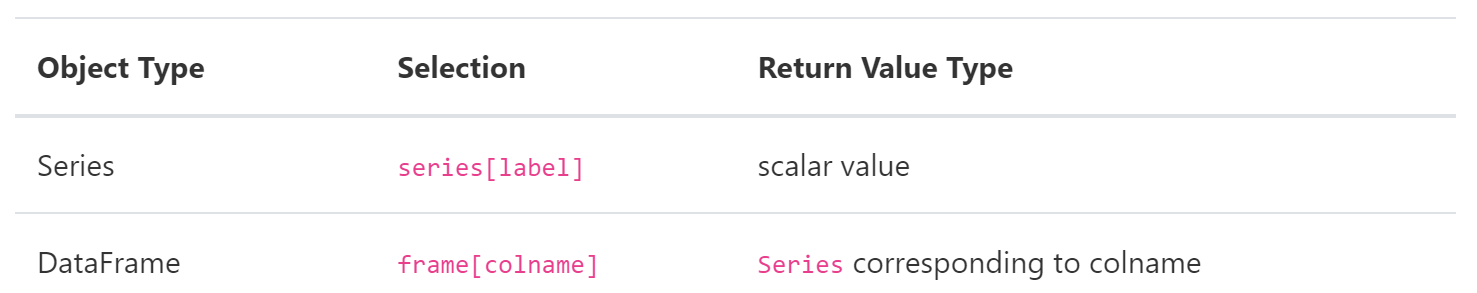
</div>

### Integer Indexes
If you have an axis index containing integers, data selection will always be label oriented. For more precise handling, use `loc` for labels or `iloc` for integers

In [52]:
ser1 = pd.Series(np.arange(3.0))
ser1

0    0.0
1    1.0
2    2.0
dtype: float64

In [53]:
ser1[-1] # pandas does not know whetehr user wants label based indexing or position based

KeyError: -1

In [54]:
ser1.iloc[-1]

2.0

On the other hand, with a non-integer index, there is no potential for ambiguity

In [55]:
ser2 = pd.Series(np.arange(3.0), index = ['a', 'b', 'c'])
ser2[-1]

2.0

Slicing with integers is always integer oriented

In [56]:
ser1[:2]

0    0.0
1    1.0
dtype: float64

In [ ]:
ser2[:2]

### Selection by callable
`loc`, `iloc`, and also `[]` indexing can accept a `callable` as indexer. The `callable` must be a function with one argument (the calling `Series` or `DataFrame`) that returns valid output for indexing

In [34]:
df1 = pd.DataFrame(np.random.randn(6, 4),
                   index = list('abcdef'),
                   columns = list('ABCD'))
df1

,A,B,C,D
a,-1.192414,0.650334,0.289228,-0.439421
b,0.069098,-2.461346,1.969843,1.233625
c,-0.474287,-1.813805,-1.344316,0.499150
d,0.084095,-0.509015,0.051318,1.179576
e,-2.579363,-0.462447,0.451952,-1.137888
f,-1.045300,-0.531952,-1.577184,0.949844


In [35]:
df1.loc[lambda df: df['A'] > 0, :]

,A,B,C,D
b,0.069098,-2.461346,1.969843,1.233625
d,0.084095,-0.509015,0.051318,1.179576


In [36]:
df1.loc[:, lambda df: ['A', 'B']]

,A,B
a,-1.192414,0.650334
b,0.069098,-2.461346
c,-0.474287,-1.813805
d,0.084095,-0.509015
e,-2.579363,-0.462447
f,-1.045300,-0.531952


In [37]:
df1.iloc[:, lambda df: [0, 1]]

,A,B
a,-1.192414,0.650334
b,0.069098,-2.461346
c,-0.474287,-1.813805
d,0.084095,-0.509015
e,-2.579363,-0.462447
f,-1.045300,-0.531952


In [38]:
df1[lambda df: df.columns[0]] #equivalent to df1['A']

a   -1.192414
b    0.069098
c   -0.474287
d    0.084095
e   -2.579363
f   -1.045300
Name: A, dtype: float64

In [39]:
# use callable indexing in Series
df1['A'].loc[lambda s: s > 0]

b    0.069098
d    0.084095
Name: A, dtype: float64

### Indexing Options With `DataFrame`
- `df[val]`: select single column or sequence of columns from df. Special case convenineces: boolean array (filter rows), slice (slice rows), or boolean DataFrame (set values based on some criteria)
- `df.loc[val]`: select single row or subset of rows from df by label
- `df.loc[:, val]`: select single column or subset of columns by label
- `df.loc[val1, val2]`: select both rows and columns by label
- `df.iloc[i]`: select single row or subset of rows from df by integer position
- `df.iloc[:, j]`: select single column or subset of columns from df by integer position
- `df.iloc[i, j]`: select both rows and columns by integer position
- `df.at[i, j]`: select single scalar value by row and column label
- `df.iat[i, j]`: select single scalar value by row and column integer position

### Sorting
To sort lexicographically by row or column index, use the `sort_index` method which returns a new sorted object

In [ ]:
obj = pd.Series(range(4), index = ['d', 'a', 'b', 'c'])
obj.sort_index()

With a DataFrame, you can sort by index on either axis

In [20]:
frame = pd.DataFrame(np.arange(8).reshape((2, 4)),
                     index = ['three', 'one'],
                     columns = ['d', 'a', 'b', 'c'])
frame

,d,a,b,c
three,0,1,2,3
one,4,5,6,7


In [21]:
frame.sort_index() # default sort by row axis = 0

,d,a,b,c
one,4,5,6,7
three,0,1,2,3


In [22]:
frame.sort_index(axis = 1) # sort by column axis = 1

,a,b,c,d
three,1,2,3,0
one,5,6,7,4


The data is sorted in ascending order by default. You can sort in descending order by set `ascending` to `False`

In [23]:
frame.sort_index(axis = 1, ascending = False)

,d,c,b,a
three,0,3,2,1
one,4,7,6,5


To sort a Series by its values, use its `sort_values` method

In [24]:
obj = pd.Series([4, 7, -3, 2])
obj

0    4
1    7
2   -3
3    2
dtype: int64

In [25]:
obj.sort_values()

2   -3
3    2
0    4
1    7
dtype: int64

Any missing values are sorted to the end of the Series by default

In [ ]:
obj = pd.Series([4, np.nan, 7, np.nan, -3, 2])
obj

In [ ]:
obj.sort_values()

When sorting DataFrame, you can use the data in one or more columns as the sort keys. To do so, pass one or more column names to the `by` option of `sort_values`

In [ ]:
frame = pd.DataFrame({'b': [4, 7, -3, 2], 'a': [0, 1, 0, 1], 'c': [3, 9, -3, -6]})
frame

In [ ]:
frame.sort_values(by = 'b')

In [ ]:
frame.sort_values(by = ['a', 'b'])

In [ ]:
frame.sort_values(by = ['a', 'b'], ascending = [True, False])

### `argmax`, `argmin`, `idxmax` and `idxmax`
- `argmin`, `argmax`: compute index locations (integers) at which minimum or maximum value obtained, respectively, in Numpy
- `idxmin`, `idxmax`: return index of first occurrence of maximum/maximum over requested axis `(axis = 0, skipna = True)`    

In [ ]:
df = pd.DataFrame([[1.4, np.nan], [7.1, -4.5],
                   [np.nan, np.nan], [0.75, -1.3]],
                  index = ['a', 'b', 'c', 'd'],
                  columns = ['one', 'two'])
df

In [ ]:
df.idxmax()

In [ ]:
df.idxmin()

### Unique Values, Value Counts and Membership
Another class of relarted methods extracts information about the values contained in a one-dimensional `Series`

- `isin`: compute boolean array indicating whether each Series value is contained in the passed sequence of values
- `unique`: compute array of unique values in a Series, returned in the order observed
- `value_counts`: return a Series containing unique values as its index and frequencies as it values, order count in descending order

In [40]:
obj = pd.Series(['c', 'a', 'd', 'a', 'a', 'b', 'b', 'c', 'c'])
obj

0    c
1    a
2    d
3    a
4    a
5    b
6    b
7    c
8    c
dtype: object

The first function is `unique` which gives you an array of the unique values in a `Series`

In [41]:
uniques = obj.unique()
uniques

array(['c', 'a', 'd', 'b'], dtype=object)

The unique values are not necessarily returned in sorted order. Relatedly, `value_counts` function computs a `Series` containing value frequencies

In [42]:
obj.value_counts()

c    3
a    3
b    2
d    1
dtype: int64

The `Series` is sorted by value in descending order as a convenience. Both `unique` and `value_counts` are also available as a top-level Pandas methods `pd.unique()` and `pd.value_counts()` that can be used with any array or sequence

In [43]:
pd.value_counts(obj.values, sort = False)

c    3
a    3
d    1
b    2
dtype: int64

`isin` performs a vectorized set membership check and can be useful in filtering a dataset down to a subset of values in a `Series` or column in a `DataFrame`

In [44]:
obj

0    c
1    a
2    d
3    a
4    a
5    b
6    b
7    c
8    c
dtype: object

In [45]:
# select only item value b and c from Series obj
mask = obj.isin(['b', 'c'])
mask

0     True
1    False
2    False
3    False
4    False
5     True
6     True
7     True
8     True
dtype: bool

In [46]:
obj[mask]

0    c
5    b
6    b
7    c
8    c
dtype: object

Related to `isin` is the `Index.get_indexer` method. It computes integer indices for each value in an array into another array of distinct values

In [47]:
to_match = ['B', 'C']
pd.Index(['A', 'B', 'C', 'D', 'E']).get_indexer(to_match)

array([1, 2])

### Function Application and Mapping
Numpy ufuncs (element-wise array methods) also work with Pandas objects

In [6]:
frame = pd.DataFrame(np.random.randn(4, 3), columns = list('BDE'),
                     index = ['Utah', 'Ohio', 'Texas', 'Oregon'])
frame

,B,D,E
Utah,1.763794,0.794307,0.908373
Ohio,-1.455417,0.320325,2.396986
Texas,1.113335,1.373855,-2.071915
Oregon,-1.643569,0.616043,1.816770


In [ ]:
np.abs(frame)

Another frequent operation is applying a function on one-dimensional arrays to each column or row. You can use DataFrame's `apply` method to achieve it

In [ ]:
f = lambda x: x.max() - x.min()
frame.apply(f)

Here the function `f`, which computes the difference between the maximum and minimum of a Series, is invoked once on each column in frame. The result is a Series having the column names of frame as its index.

If you pass `axis = 1` to `apply`, the function will be invoked once per row instead

In [ ]:
frame.apply(f, axis = 'columns')

The function passed to `apply` need not return a scalar value. It can aslo return a Series with multiple values

In [ ]:
def f(x):
    return pd.Series([x.min(), x.max()], index = ['min', 'max'])
frame.apply(f)

Element-wise Python functions can be used too by using `applymap`

In [ ]:
format = lambda x: '%.2f' % x
frame.applymap(format)

The reason for the name `applymap` is that Series has a `map` method for applying an element-wise function. Using `map` is convenient way to perform element-wise transformations and other data cleaning-related operations

In [ ]:
frame['E'].map(format)

For many datasets, you may wish to perform some transformation based on the values in an array, Series, or column in a DataFrame

In [ ]:
data = pd.DataFrame({'food': ['bacon', 'pulled pork', 'bacon',
                              'Pastrami', 'corned beef', 'Bacon',
                              'pastrami', 'honey ham', 'nova lox'],
                     'ounces': [4, 3, 12, 6, 7.5, 8, 3, 5, 6]})
data

Suppose you wanted to add a column indicating the type of animal that each food came from. You can write down a mapping of each distinct meat type to the kind of animal

In [ ]:
meat_to_animal = {
  'bacon': 'pig',
  'pulled pork': 'pig',
  'pastrami': 'cow',
  'corned beef': 'cow',
  'honey ham': 'pig',
  'nova lox': 'salmon'
}

The `map` method on a Series accepts a function or dict-like object containing a mapping. Here we have a small problem in that some of the meats are capitalized and others are not. Therefore, we need to convert each value to lowercase using `str.lower` Series method

In [ ]:
lowercased = data['food'].str.lower()
lowercased

In [ ]:
data['animal'] = lowercased.map(meat_to_animal)
data

We can also pass a function that does the same work

In [ ]:
data['food'].map(lambda x: meat_to_animal[x.lower()]) # x denotes each value from the Series

### Axis Indexes with Duplicate Labels
While many Pandas functions such as `reindex` require that the labels be unique, it is not mandatory.

In [ ]:
obj = pd.Series(range(5), index=['a', 'a', 'b', 'b', 'c'])
obj

The index's `is_unique` attribute can tell whether its labels are unique or not

In [ ]:
obj.index.is_unique

Data selection is one of the main things that behaves differently with duplicates. Indexing a label with multiple entries returns a Series, while single entry returns a scalar values

In [ ]:
obj['a']

In [ ]:
obj['c']

The same logic extends to indexing rows in a DataFrame

In [ ]:
df = pd.DataFrame(np.random.randn(4, 3), index=['a', 'a', 'b', 'b'])
df

In [ ]:
df.loc['b']

### `pct_change`, `shift`, `diff` in Pandas Series
- `pct_change`: Percentage change between the current and a prior element. Computes the percentage change from the immediately previous row by default. This is useful in comparing the percentage of change in a time series of elements.
- `shift`: Shift index by desired number of periods (can be positive or negative) with an optional time `freq`. When freq is not passed, shift the index without realigning the data
- `diff`: First discrete difference of element. Calculates the difference of a Dataframe element compared with another element in the Dataframe (default is element in previous row)

### Case Study

In [61]:
df = pd.read_csv('temperature_multi_year.csv', index_col = 'Day', parse_dates = True)
df.head()

FileNotFoundError: [Errno 2] No such file or directory: 'temperature_multi_year.csv'

In [ ]:
df['High Temperature'] = df['High Temperature'].str.replace("℃", "").astype('int32')
df.head()

In [ ]:
df[['High Temperature']] # double [] -> a dataframe

In [ ]:
df['High Temperature'] # single [] -> a series

In [ ]:
df = df[['High Temperature']].resample("M").mean()
df.head()

In [ ]:
df.sort_index(ascending = True, inplace = True)

In [ ]:
df.index

In [ ]:
%matplotlib inline
df.plot()

#### Method 1

In [ ]:
df['Month_Comp_1'] = df['High Temperature'].pct_change(periods = 1)
df['Year_Comp_1'] = df['High Temperature'].pct_change(periods = 12)
df.head(15)

#### Method 2

In [ ]:
# shift does not change index
pd.concat(
    [df['High Temperature'], 
     df['High Temperature'].shift(periods = 1), 
     df['High Temperature'].shift(periods = 12)],
    axis = 1
).head(15)

In [ ]:
# Monthly Comparison
series_shift1 = df['High Temperature'].shift(periods = 1)
df['Month_Comp_2'] = (df['High Temperature'] - series_shift1) / series_shift1

# Yearly Comparison
series_shift2 = df['High Temperature'].shift(periods = 12)
df['Year_Comp_2'] = (df['High Temperature'] - series_shift2) / series_shift2
df.head(15)

#### Method 3

In [ ]:
pd.concat(
    [df['High Temperature'], 
     df['High Temperature'].diff(periods = 1), 
     df['High Temperature'].diff(periods = 12)],
    axis = 1
).head(15)

In [ ]:
# Monthly Comparison
series_diff1 = df['High Temperature'].diff(periods = 1)
df['Month_Comp_3'] = series_diff1 / (df['High Temperature'] - series_diff1)

# Yearly Comparison
series_diff2 = df['High Temperature'].diff(periods = 12)
df['Year_Comp_3'] = series_diff2 / (df['High Temperature'] - series_diff2)
df.head(15)

### Correlation and Covariance
Some summary statistics, like correlation and covariance, are computed from pairs of arguents. The `corr` method of `series` computes the correlation of the overlapping, non-NA, aligned by index values in two Series. DataFrame's `corr` and `cov` methods, on the other hand, return a full correlation or covariance matrix as a DataFrame, respectively

In [ ]:
df = pd.DataFrame(np.random.randn(6, 6), columns = list('ABCDEF'))
df

In [ ]:
df.corr()

In [ ]:
df['A'].corr(df['B'])

### Reading and Writing Data in Text Format
Pandas features a number of functions for reading tabular data as a `DataFrame`. We will focus on `read_csv`, `read_excel`, `read_html`, and `read_sql`

#### Read CSV File
- `filepath`: Any valid string path is acceptable. The string could be a URL
- `sep`: str default `','`. If `sep` is `None`, the C engine cannot automatically detect the separator, but the Python parsing engine can
- `header`: If no names are passed the behavior is identical to `header = 0` and column names are inferred from the first line of the file, if column names are passed explicitly then the behavior is identical to `header = None`
- `names`: List of column names to use
- `index_col`: Column(s) to use as the row labels of the DataFrame, either given as string name or column index.
- `engine`: Parser engine to use. 'c' or 'python'
- `skiprows`: Line numbers to skip (0-indexed) or number of lines to skip (`int`) at the start of the file
- `skipfooter`: Number of lines at bottom of file to skip (Unsupported with `engine = 'c'`)

In [ ]:
df = pd.read_csv('salaries-by-college-type.csv')
df

To write delimited files manually, you can use `csv.writer`. It accepts an open, writable fiel object and the same dialect and format options as `csv.reader`

In [ ]:
import csv

CVS files come in many different flavors. To define a new format with different delimiter, string quoting convention, or line terminator, we define a simple subclass of `csv.Dialect`

In [ ]:
# optional to use
class my_dialect(csv.Dialect):
    lineterminator = '\n'
    delimiter = ','
    quotechar = '"'
    quoting = csv.QUOTE_MINIMAL

In [ ]:
with open('mytestdata.csv', 'w') as f:
    writer = csv.writer(f, dialect = my_dialect)
    #writer = csv.writer(f)
    writer.writerow(['one', 'two', 'three'])
    writer.writerow(['1', '2', '3'])
    writer.writerow(['4', '5', '6'])
    writer.writerow(['7', '8', '9'])

#### Read Text File

In [ ]:
df = pd.read_csv(
    'test.txt',
    sep = "\t",
    header = None,
    names = ['pdate', 'A', 'B']
)
df

#### Read Excel File

In [ ]:
df = pd.read_excel('student_excel.xlsx', 'Sheet1', skiprows = 2)
df

#### Read HTML File
The `read_html` function by default searches for and attempts to parse all tabular data contained within `<table>` tags. The result is a list of `DataFrame` object

In [ ]:
import ssl

ssl._create_default_https_context = ssl._create_unverified_context

df = pd.read_html('https://www.fdic.gov/resources/resolutions/bank-failures/failed-bank-list/')
df[0]